### Step 0 Imports and Reading Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

In [5]:
df = pd.read_csv('/Users/kaancakir/data/cryptoAnalysis/Top 100 Crypto Coins/ethereum.csv') 

### Step 1: Data Understanding

In [6]:
df.shape

(2358, 7)

In [7]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Currency'], dtype='object')

In [16]:
df.dtypes

Date        datetime64[ns]
Open               float64
High               float64
Low                float64
Close              float64
Volume               int64
Currency            object
dtype: object

In [8]:
df.describe()

,Open,High,Low,Close,Volume
count,2358.000000,2358.000000,2358.000000,2358.000000,2.358000e+03
mean,847.608083,877.386828,813.515225,848.270513,1.269467e+07
std,1150.297624,1186.544788,1107.868923,1150.261834,1.014013e+08
min,6.680000,7.320000,5.860000,6.700000,0.000000e+00
25%,138.767500,144.417500,134.780000,138.990000,5.465530e+05
50%,279.165000,288.000000,266.885000,280.115000,1.429778e+06
75%,1124.007500,1170.885000,1045.820000,1127.730000,7.717627e+06
max,4808.340000,4864.060000,4715.430000,4808.380000,1.792561e+09


In [9]:
df.head()

,Date,Open,High,Low,Close,Volume,Currency
0,2016-03-10,11.20,11.85,11.07,11.75,4,USD
1,2016-03-11,11.75,11.95,11.75,11.95,179,USD
2,2016-03-12,11.95,13.45,11.95,12.92,833,USD
3,2016-03-13,12.92,15.07,12.92,15.07,1295,USD
4,2016-03-14,15.07,15.07,11.40,12.50,92183,USD


### Step 2: Data Preperation

In [15]:
df['Date'] = pd.to_datetime(df['Date'])

In [14]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Currency'], dtype='object')

In [19]:
df = df.rename(columns = {'Volume' : 'Eth_Volume'})
df = df.rename(columns = {'Eth_Volume' : 'Volume'})

In [20]:
df.head()

,Date,Open,High,Low,Close,Volume,Currency
0,2016-03-10,11.20,11.85,11.07,11.75,4,USD
1,2016-03-11,11.75,11.95,11.75,11.95,179,USD
2,2016-03-12,11.95,13.45,11.95,12.92,833,USD
3,2016-03-13,12.92,15.07,12.92,15.07,1295,USD
4,2016-03-14,15.07,15.07,11.40,12.50,92183,USD


In [23]:
df.isna()
df.isna().sum()


Date        0
Open        0
High        0
Low         0
Close       0
Volume      0
Currency    0
dtype: int64

In [24]:
df.duplicated().sum()

np.int64(0)

### Step 3: Feature Understanding

In [25]:
df

,Date,Open,High,Low,Close,Volume,Currency
0,2016-03-10,11.20,11.85,11.07,11.75,4,USD
1,2016-03-11,11.75,11.95,11.75,11.95,179,USD
2,2016-03-12,11.95,13.45,11.95,12.92,833,USD
3,2016-03-13,12.92,15.07,12.92,15.07,1295,USD
4,2016-03-14,15.07,15.07,11.40,12.50,92183,USD
...,...,...,...,...,...,...,...
2353,2022-08-19,1846.52,1846.97,1607.60,1609.48,1594321,USD
2354,2022-08-20,1609.01,1654.84,1525.51,1575.60,1007240,USD
2355,2022-08-21,1575.61,1644.88,1563.92,1618.25,852071,USD
2356,2022-08-22,1618.21,1627.13,1531.91,1626.75,1044290,USD


In [26]:
df['Close'].value_counts()

Close
10.16      9
12.01      6
11.75      3
12.92      3
12.90      3
          ..
468.78     1
470.23     1
462.75     1
472.03     1
1623.24    1
Name: count, Length: 2246, dtype: int64

Text(0, 0.5, 'Prices')

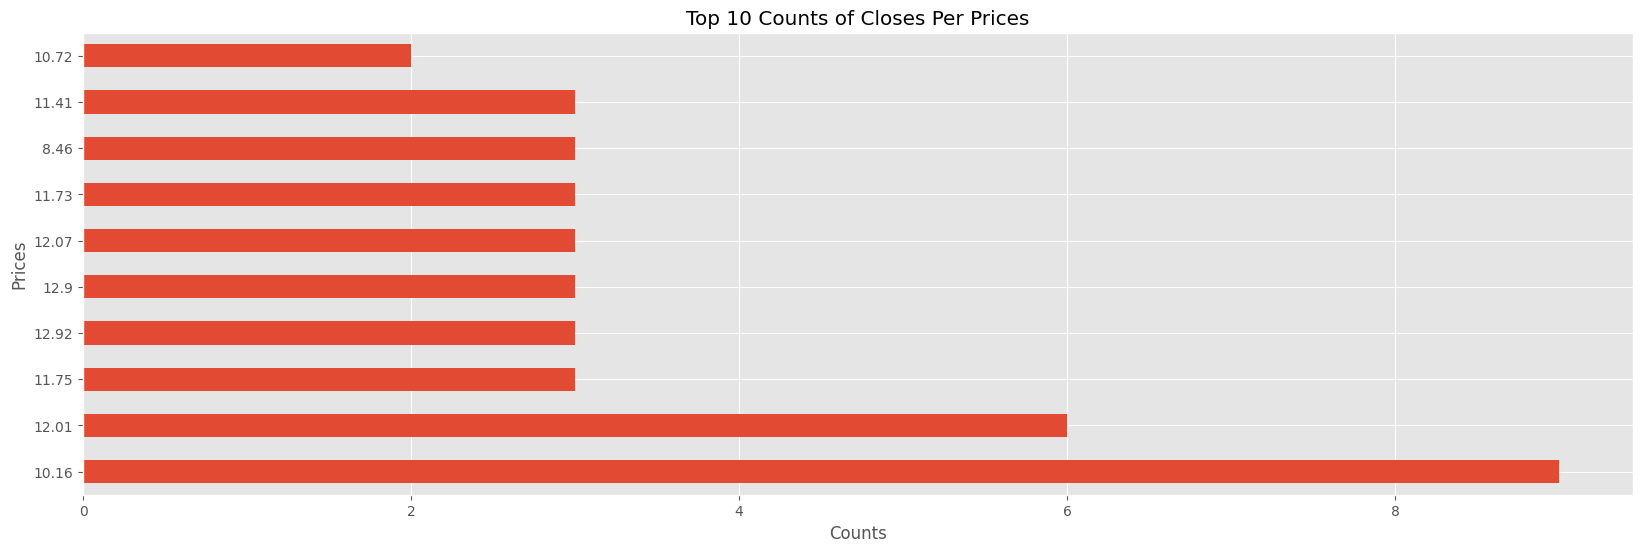

In [34]:
ax = df['Close'] \
.value_counts() \
.head(10)\
.plot(kind='barh', title = 'Top 10 Counts of Closes Per Prices',figsize=(20,6))

ax.set_xlabel('Counts')
ax.set_ylabel('Prices')

Text(0, 0.5, 'Counts')

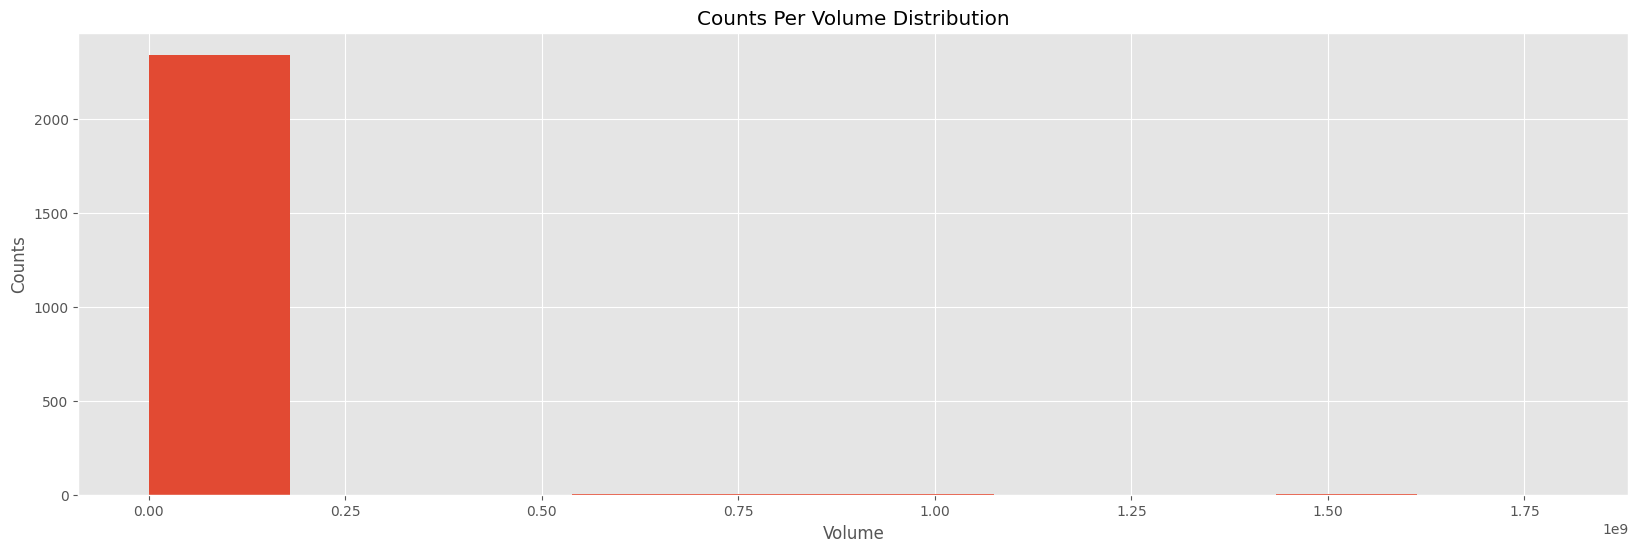

In [ ]:
ax = df['Volume']\
.plot(kind='hist', title = 'Counts Per Volume Distribution', figsize=(20,6))

ax.set_xlabel('Volume')
ax.set_ylabel('Counts')


Text(0, 0.5, 'Counts')

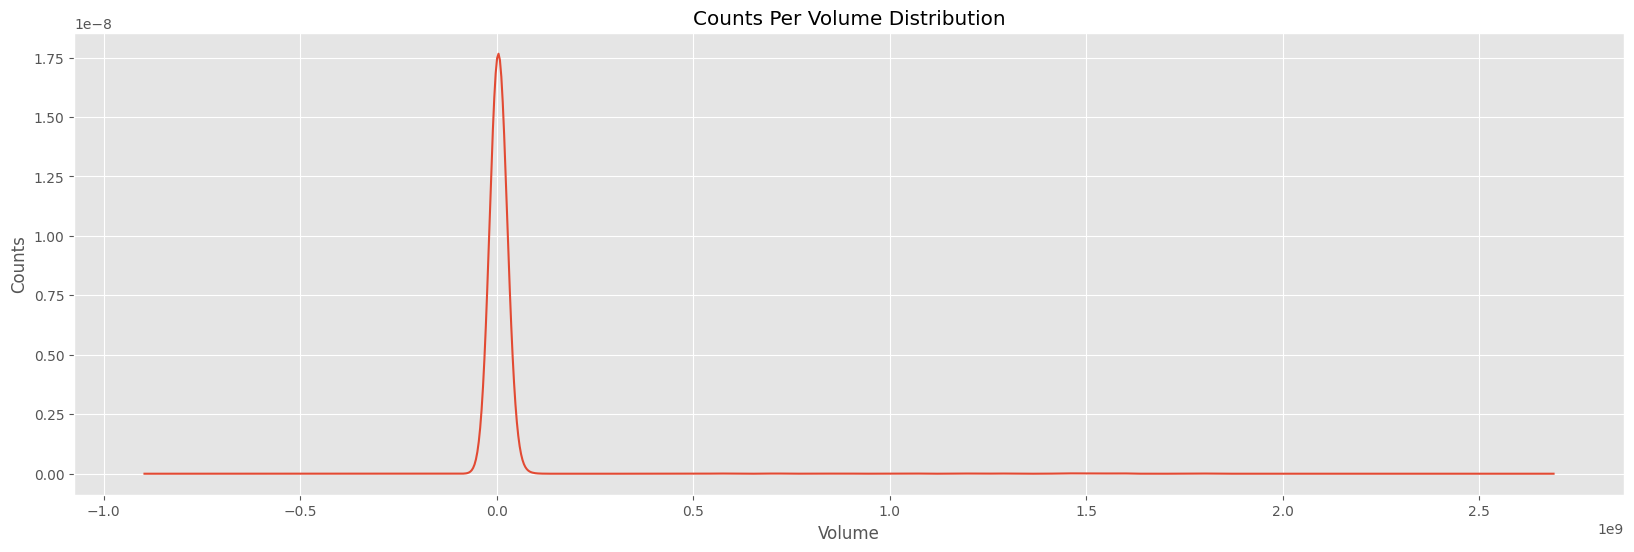

In [45]:
ax = df['Volume']\
.plot(kind='kde', title = 'Counts Per Volume Distribution', figsize=(20,6))

ax.set_xlabel('Volume')
ax.set_ylabel('Counts')


### Step 4: Feature Relationships

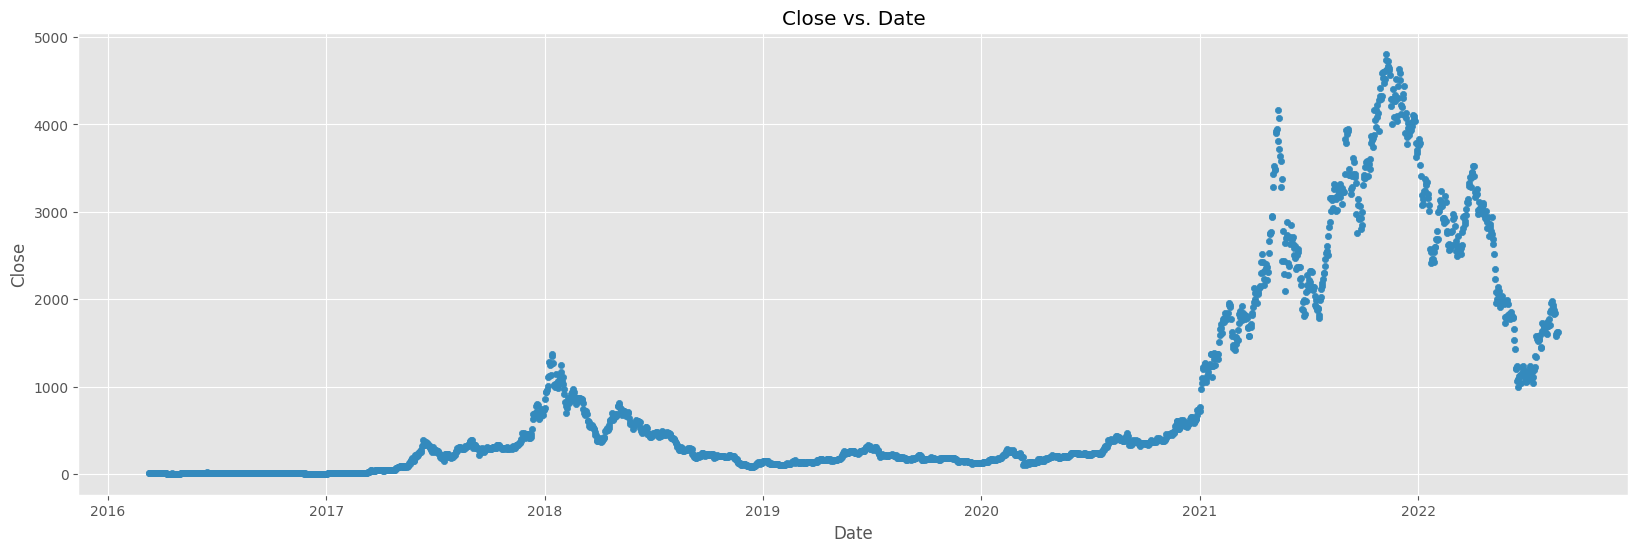

In [54]:
df.plot(kind='scatter', x='Date', y='Close', figsize=(20,6), title='Close vs. Date')

plt.show()

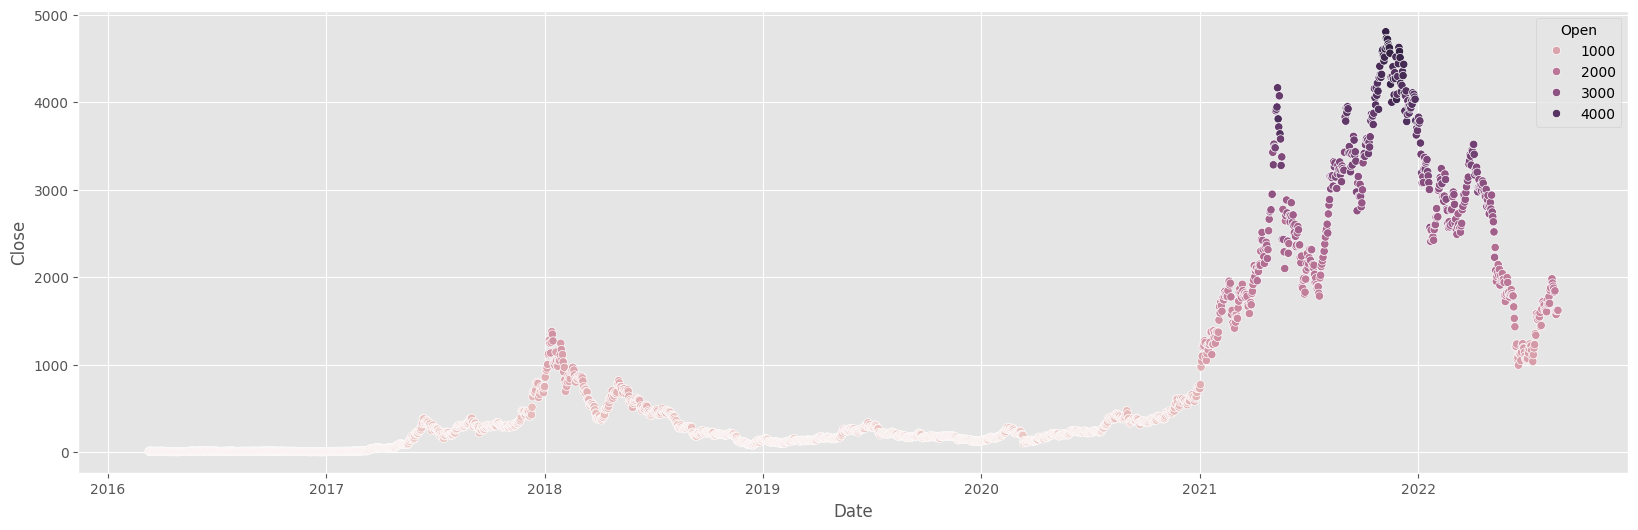

In [55]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='Date', y='Close', hue='Open', data=df)
plt.show()

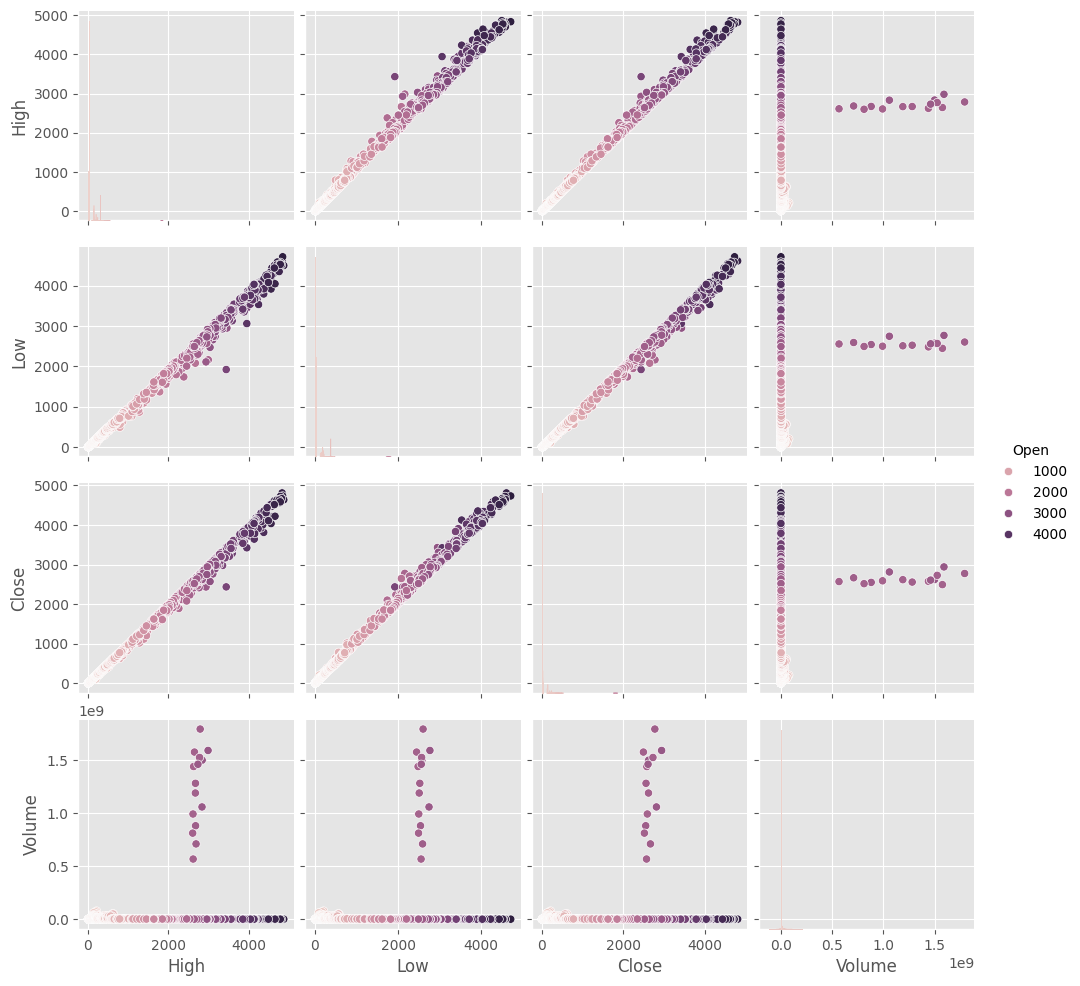

In [60]:
sns.pairplot(df[['Open', 'High', 'Low', 'Close', 'Volume']], hue='Open')

plt.show()

In [78]:
df_corelations = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

df_corelations

,Open,High,Low,Close,Volume
Open,1.000000,0.999345,0.998521,0.998139,0.099923
High,0.999345,1.000000,0.998430,0.999105,0.100161
Low,0.998521,0.998430,1.000000,0.999084,0.101734
Close,0.998139,0.999105,0.999084,1.000000,0.100646
Volume,0.099923,0.100161,0.101734,0.100646,1.000000


<Axes: >

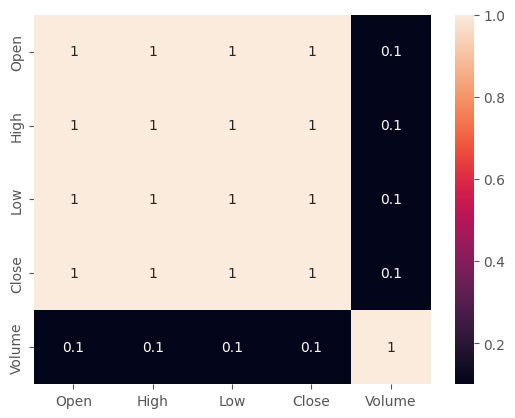

In [80]:
sns.heatmap(df_corelations, annot=True)

### Step 5: Ask a Question About Data

What are the periods of highest volatility in Ethereum prices?

In [ ]:
# Calculate daily volatility
df['Price_Range'] = df['High'] - df['Low']

# Sort the dataframe by Price_Range in descending order to find the periods with the highest volatility
df_high_volatility = df.sort_values(by='Price_Range', ascending=False)

# Crop the times from dates
df_high_volatility['Date'] = df_high_volatility['Date'].dt.date

# Display the top 10 periods with the highest volatility
df_high_volatility[['Date', 'High', 'Low', 'Price_Range']].head(10)

,Date,High,Low,Price_Range
1896,2021-05-19,3434.01,1922.25,1511.76
2007,2021-09-07,3945.79,3061.30,884.49
1897,2021-05-20,2988.52,2163.40,825.12
1898,2021-05-21,2931.66,2111.42,820.24
2095,2021-12-04,4237.56,3533.02,704.54
1900,2021-05-23,2379.89,1739.91,639.98
2087,2021-11-26,4548.10,3917.43,630.67
2094,2021-12-03,4646.73,4047.07,599.66
1901,2021-05-24,2667.20,2080.87,586.33
1889,2021-05-12,4366.10,3794.15,571.95


<Axes: title={'center': 'Top 10 High Volatility Periods'}, ylabel='Date'>

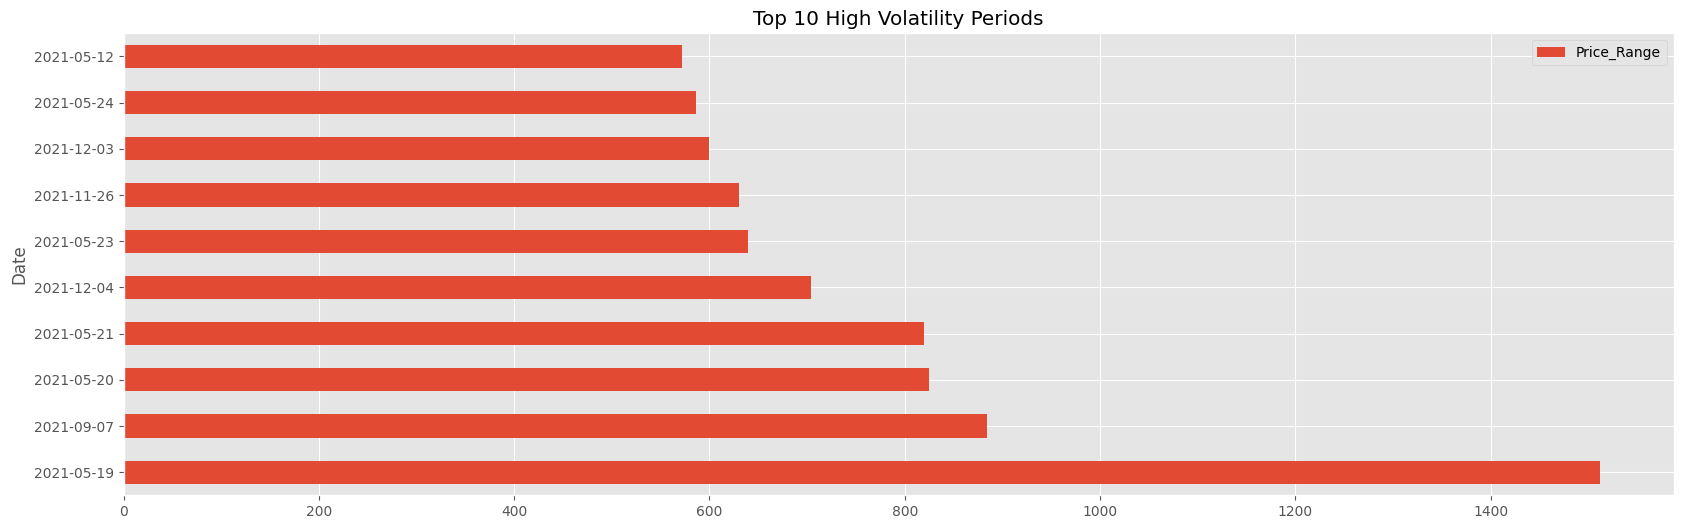

In [ ]:
df_high_volatility[['Date', 'High', 'Low', 'Price_Range']].head(10).plot(kind='barh', x='Date', y='Price_Range', figsize=(20,6), title='Top 10 High Volatility Periods', color=['tile'])